In [1]:
from utils.GPmodel import GPmodel
from utils.OLPriGP import OLPriGP
from utils.OLPriGPVar import OLPriGPVar
from utils.OLPoE import OLPoE
from utils.OLgPoE import OLgPoE
from utils.OLBCM import OLBCM
from utils.OLrBCM import OLrBCM
from utils.OLMoE import OLMoE
from utils.OLIndiv import OLIndiv

from utils.AgentDynamics import agentDynamics
from utils.dyn import dyn
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import math
import networkx as nx
from scipy.stats import norm
from scipy.integrate import solve_ivp  # Modern replacement for odeint

In [2]:
agentQuantity = 6
# Create an empty graph
G = nx.Graph()
# Add 4 nodes to the graph
nodes = range(0, agentQuantity)
G.add_nodes_from(nodes)
# Add self-loops to each node
for node in nodes:
    G.add_edge(node, node)
# Manually specify the edges you want in your graph
edges = [(0, 1), (1, 3), (3, 5), 
         (4, 5), (2, 4), (0, 2), 
         (0, 5), (2, 3), (1, 4)]
# Add the specified edges to the graph
G.add_edges_from(edges)

In [3]:
indivDataThersh = 200
x_dim = 2
y_dim = 1
sigmaN = 0.01 * np.ones([1, y_dim], dtype=float)
sigmaF = 1.0 * np.ones([1, y_dim], dtype=float)
sigmaL = 1.0 * np.ones([x_dim, y_dim], dtype=float)

f_true = lambda x: 2*np.array([[xi[1]*np.sin(4*xi[1]) + np.cos(xi[0]), 
                             xi[1]*np.sin(2*(xi[0]**2)) + np.cos(xi[0])] for xi in x])
priorFunc1 = lambda x: 2*np.array([[x[0,1]*np.sin(4*x[0,1]), 
                                  x[0,1]*np.sin(2*(x[0,0]**2)) ]])
priorFunc2 = lambda x: 2*np.array([[np.cos(x[0,0]), 
                                  np.cos(x[0,0]) ]])
priorFunc3 = lambda x: f_true(x)
priorFunc4 = lambda x: -2*np.array([[ np.sin(x[0,0]), 
                                x[0,1]*np.sin(2*(x[0,0]**2)) ]])
priorFunc5 = lambda x: -2*np.array([[x[0,1]*np.cos(4*x[0,1]), 
                                 np.cos(x[0,0]) ]])
priorFunc6 = lambda x: 0*np.ones([1,np.size(x,1)])

priorFunc1_1 = lambda x: priorFunc1(x)[:, 0:1]
priorFunc2_1 = lambda x: priorFunc2(x)[:, 0:1]
priorFunc3_1 = lambda x: priorFunc3(x)[:, 0:1]
priorFunc4_1 = lambda x: priorFunc4(x)[:, 0:1]
priorFunc5_1 = lambda x: priorFunc5(x)[:, 0:1]
priorFunc6_1 = lambda x: priorFunc6(x)[:, 0:1]
priorFunc_lsit_1 =[priorFunc1_1,priorFunc2_1,priorFunc3_1,priorFunc4_1,priorFunc5_1,priorFunc6_1]

np.random.seed(42)
t = np.linspace(0, 4*math.pi, indivDataThersh)
X_r = np.array([np.sin(1*t), np.cos(1*t)]).T 
X_r_dot = np.array([1*np.cos(1*t), -1*np.sin(1*t)]).T
Y_r = f_true(X_r)

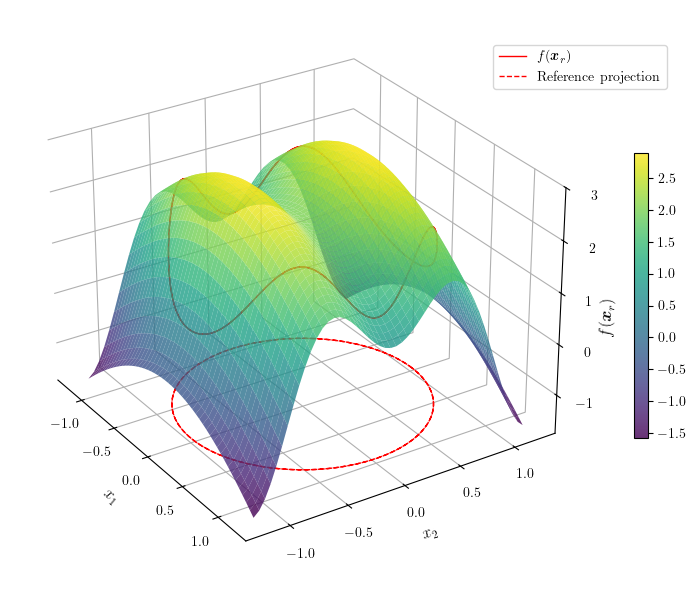

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for visualizing the manifold
x1 = np.linspace(-1.2, 1.2, 50)
x2 = np.linspace(-1.2, 1.2, 50)
X1, X2 = np.meshgrid(x1, x2)

# Reshape for input to f_true
X_mesh = np.array([[x1, x2] for x1, x2 in zip(X1.flatten(), X2.flatten())])
Z = f_true(X_mesh)
Z1 = Z[:, 0].reshape(X1.shape)  # First output dimension
Z2 = Z[:, 1].reshape(X1.shape)  # Second output dimension

# Calculate f_true values along the reference trajectory
Y_r = f_true(X_r)


plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsfonts}')
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})



# Create a single figure
fig = plt.figure(figsize=(8, 6))

# Create a single 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X1, X2, Z1, cmap='viridis', alpha=0.8)

# Plot the reference trajectory in 3D
ax.plot3D(X_r[:, 0], X_r[:, 1], Y_r[:, 0], 'r-', linewidth=1, label=r'$f(\boldsymbol{x}_{r})$')

# Add the projection of reference trajectory on z=min(Z1)
zmin = np.min(Z1)
ax.plot3D(X_r[:, 0], X_r[:, 1], np.ones_like(X_r[:, 0])*zmin, 
          linestyle='--', color='r', linewidth=1, alpha=1, label='Reference projection')

ax.view_init(elev=28, azim=-33)  # Adjust these values as needed


# Add labels and title
ax.set_xlabel('$x_{1}$', fontsize='12')
ax.set_ylabel('$x_{2}$', fontsize='12')
ax.set_zlabel(r'$f(\boldsymbol{x}_{r})$', fontsize='12', labelpad=-2)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# Add colorbar
fig.colorbar(surf, shrink=0.5, aspect=20, pad=0.07)

# Add legend
ax.legend(bbox_to_anchor=(1.0, 0.9), loc='center')
plt.tight_layout()  # Adjust layout to prevent legend cutoff
plt.show()

# Asign Classes

In [5]:
PRIGP = OLPriGP(indivDataThersh, x_dim, y_dim, sigmaN, sigmaF, sigmaL, priorFunc_lsit_1, agentQuantity, G)
PRIGPVAR = OLPriGPVar(indivDataThersh, x_dim, y_dim, sigmaN, sigmaF, sigmaL, priorFunc_lsit_1, agentQuantity, G)
POE = OLPoE(indivDataThersh, x_dim, y_dim, sigmaN, sigmaF, sigmaL, priorFunc_lsit_1, agentQuantity, G)
GPOE = OLgPoE(indivDataThersh, x_dim, y_dim, sigmaN, sigmaF, sigmaL, priorFunc_lsit_1, agentQuantity, G)
BCM = OLBCM(indivDataThersh, x_dim, y_dim, sigmaN, sigmaF, sigmaL, priorFunc_lsit_1, agentQuantity, G)
RBCM = OLrBCM(indivDataThersh, x_dim, y_dim, sigmaN, sigmaF, sigmaL, priorFunc_lsit_1, agentQuantity, G)
MOE = OLMoE(indivDataThersh, x_dim, y_dim, sigmaN, sigmaF, sigmaL, priorFunc_lsit_1, agentQuantity, G)
INDIV = OLIndiv(indivDataThersh, x_dim, y_dim, sigmaN, sigmaF, sigmaL, priorFunc_lsit_1, agentQuantity, G)

mu_PriVar_list = [[] for _ in range(agentQuantity)]
mu_Pri_list = [[] for _ in range(agentQuantity)]
mu_PoE_list = [[] for _ in range(agentQuantity)]
mu_gPoE_list = [[] for _ in range(agentQuantity)]
mu_BCM_list = [[] for _ in range(agentQuantity)]
mu_rBCM_list = [[] for _ in range(agentQuantity)]
mu_MoE_list = [[] for _ in range(agentQuantity)]
mu_ind_list = [[] for _ in range(agentQuantity)]

y_Pri_list = [[] for _ in range(agentQuantity)]
y_PoE_list = [[] for _ in range(agentQuantity)]
y_gPoE_list = [[] for _ in range(agentQuantity)]
y_BCM_list = [[] for _ in range(agentQuantity)]
y_rBCM_list = [[] for _ in range(agentQuantity)]
y_MoE_list = [[] for _ in range(agentQuantity)]
y_ind_list = [[] for _ in range(agentQuantity)]

In [6]:
kp = 4
kd = 4
# initial state and error
x = np.zeros((1, 2))  # Your state vector
u = np.zeros((1, 2))  # Your control input
e = x-X_r[0:1,:]
dt = t[1] - t[0]  # Time step
state = np.array([x[0,0], x[0,1]])  # Initial state
t_span = [0, dt]  # Integration time span

states_Pri_list = [[state] for _ in range(agentQuantity)]
states_PriVar_list = [[state] for _ in range(agentQuantity)]
states_PoE_list = [[state] for _ in range(agentQuantity)]
states_gPoE_list = [[state] for _ in range(agentQuantity)]
states_BCM_list = [[state] for _ in range(agentQuantity)]
states_rBCM_list = [[state] for _ in range(agentQuantity)]
states_MoE_list = [[state] for _ in range(agentQuantity)]
states_ind_list = [[state] for _ in range(agentQuantity)]

## Initial Prediction

In [7]:
# Test initial prediction
for i_agent in range(agentQuantity):
    PRIGP.requestWhichNeighbors_initial(i_agent)
    PRIGPVAR.requestWhichNeighbors_initial(i_agent)
    mu_Pri = PRIGP.predict_Pri_initial(i_agent, x)
    mu_PriVar = PRIGPVAR.predict_Pri_initial(i_agent, x)
    mu_PoE = np.array([[POE.predict_PoE_initial(i_agent, x)]])
    mu_gPoE = np.array([[GPOE.predict_gPoE_initial(i_agent, x)]])
    mu_BCM = np.array([[BCM.predict_BCM_initial(i_agent, x)]])
    mu_rBCM = np.array([[RBCM.predict_rBCM_initial(i_agent, x)]])
    mu_MoE = np.array([[MOE.predict_MoE_initial(i_agent, x)]])
    mu_ind, var_ind = INDIV.agents[i_agent].predict_initial(x)

    u_Pri = - np.dot(e, np.array([kp,1])) - np.dot(e, np.array([0, kd])) + X_r_dot[0:1, 1:2] - mu_Pri
    u_PriVar = - np.dot(e, np.array([kp,1])) - np.dot(e, np.array([0, kd])) + X_r_dot[0:1, 1:2] - mu_PriVar
    u_PoE = - np.dot(e, np.array([kp,1])) - np.dot(e, np.array([0, kd])) + X_r_dot[0:1, 1:2] - mu_PoE
    u_gPoE = - np.dot(e, np.array([kp,1])) - np.dot(e, np.array([0, kd])) + X_r_dot[0:1, 1:2] - mu_gPoE
    u_BCM = - np.dot(e, np.array([kp,1])) - np.dot(e, np.array([0, kd])) + X_r_dot[0:1, 1:2] - mu_BCM
    u_rBCM = - np.dot(e, np.array([kp,1])) - np.dot(e, np.array([0, kd])) + X_r_dot[0:1, 1:2] - mu_rBCM
    u_MoE = - np.dot(e, np.array([kp,1])) - np.dot(e, np.array([0, kd])) + X_r_dot[0:1, 1:2] - mu_MoE
    u_ind = - np.dot(e, np.array([kp,1])) - np.dot(e, np.array([0, kd])) + X_r_dot[0:1, 1:2] - mu_ind

    solution_Pri = solve_ivp(dyn, (0, dt), state, args=(u_Pri), method='RK45')
    new_state_Pri = solution_Pri.y[:, -1]  # Get final state
    solution_PriVar = solve_ivp(dyn, (0, dt), state, args=(u_PriVar), method='RK45')
    new_state_PriVar = solution_PriVar.y[:, -1]  # Get final state
    solution_PoE = solve_ivp(dyn, (0, dt), state, args=(u_PoE), method='RK45')
    new_state_PoE = solution_PoE.y[:, -1]  # Get final state    
    solution_gPoE = solve_ivp(dyn, (0, dt), state, args=(u_gPoE), method='RK45')
    new_state_gPoE = solution_gPoE.y[:, -1]  # Get final state    
    solution_BCM = solve_ivp(dyn, (0, dt), state, args=(u_BCM), method='RK45')
    new_state_BCM = solution_BCM.y[:, -1]  # Get final state    
    solution_rBCM = solve_ivp(dyn, (0, dt), state, args=(u_rBCM), method='RK45')
    new_state_rBCM = solution_rBCM.y[:, -1]  # Get final state    
    solution_MoE = solve_ivp(dyn, (0, dt), state, args=(u_MoE), method='RK45')
    new_state_MoE = solution_MoE.y[:, -1]  # Get final state    
    solution_ind = solve_ivp(dyn, (0, dt), state, args=(u_ind), method='RK45')
    new_state_ind = solution_ind.y[:, -1]  # Get final state    

    states_Pri_list[i_agent].append(new_state_Pri)
    states_PriVar_list[i_agent].append(new_state_PriVar)
    states_PoE_list[i_agent].append(new_state_PoE)
    states_gPoE_list[i_agent].append(new_state_gPoE)
    states_BCM_list[i_agent].append(new_state_BCM)
    states_rBCM_list[i_agent].append(new_state_rBCM)
    states_MoE_list[i_agent].append(new_state_MoE)
    states_ind_list[i_agent].append(new_state_ind)

    mu_Pri_list[i_agent].append(mu_Pri)
    mu_PriVar_list[i_agent].append(mu_Pri)
    mu_PoE_list[i_agent].append(mu_PoE)
    mu_gPoE_list[i_agent].append(mu_gPoE)
    mu_BCM_list[i_agent].append(mu_BCM)
    mu_rBCM_list[i_agent].append(mu_rBCM)
    mu_MoE_list[i_agent].append(mu_MoE)
    mu_ind_list[i_agent].append(mu_ind)

    PRIGP.agentUpdateOnce(i_agent, x, Y_r[0:1,0:1])
    PRIGPVAR.agentUpdateOnce(i_agent, x, Y_r[0:1,0:1])
    POE.agentUpdateOnce(i_agent, x, Y_r[0:1,0:1])
    GPOE.agentUpdateOnce(i_agent, x, Y_r[0:1,0:1])
    BCM.agentUpdateOnce(i_agent, x, Y_r[0:1,0:1])
    RBCM.agentUpdateOnce(i_agent, x, Y_r[0:1,0:1])
    MOE.agentUpdateOnce(i_agent, x, Y_r[0:1,0:1])
    INDIV.agentUpdateOnce(i_agent, x, Y_r[0:1,0:1])

    y_Pri_list[i_agent].append(Y_r[0:1,0:1])
    y_PoE_list[i_agent].append(Y_r[0:1,0:1])
    y_gPoE_list[i_agent].append(Y_r[0:1,0:1])
    y_BCM_list[i_agent].append(Y_r[0:1,0:1])
    y_rBCM_list[i_agent].append(Y_r[0:1,0:1])
    y_MoE_list[i_agent].append(Y_r[0:1,0:1])
    y_ind_list[i_agent].append(Y_r[0:1,0:1])

## Online Learning

In [8]:
# Test online prediction
for j_data in range(1, X_r.shape[0]):
    for i_agent in range(agentQuantity):
        x_Pri  = np.array([states_Pri_list[i_agent][-1]])
        y_Pri = f_true(x_Pri)[0:1,0:1]
        x_PoE = np.array([states_PoE_list[i_agent][-1]])
        y_PoE = f_true(x_PoE)[0:1,0:1]
        x_gPoE = np.array([states_gPoE_list[i_agent][-1]])
        y_gPoE = f_true(x_gPoE)[0:1,0:1]
        x_BCM = np.array([states_BCM_list[i_agent][-1]])
        y_BCM = f_true(x_BCM)[0:1,0:1]
        x_rBCM = np.array([states_rBCM_list[i_agent][-1]])
        y_rBCM = f_true(x_rBCM)[0:1,0:1]
        x_MoE = np.array([states_MoE_list[i_agent][-1]])
        y_MoE = f_true(x_MoE)[0:1,0:1]
        x_ind = np.array([states_ind_list[i_agent][-1]])
        y_ind = f_true(x_ind)[0:1,0:1]
        # Calculate tracking error
        e_Pri = x_Pri - X_r[j_data:j_data+1,:]
        e_PoE = x_PoE - X_r[j_data:j_data+1,:]
        e_gPoE = x_gPoE - X_r[j_data:j_data+1,:]
        e_BCM = x_BCM - X_r[j_data:j_data+1,:]
        e_rBCM = x_rBCM - X_r[j_data:j_data+1,:]
        e_MoE = x_MoE - X_r[j_data:j_data+1,:]
        e_ind = x_ind - X_r[j_data:j_data+1,:]
        # Get GP prediction
        PRIGP.requestWhichNeighbors(i_agent)
        mu_Pri = PRIGP.predict_Pri(i_agent, x_Pri)
        PRIGPVAR.requestWhichNeighbors(i_agent)
        mu_PriVar = PRIGPVAR.predict_Pri_withVar(i_agent, x_Pri)
        mu_PoE = np.array([[POE.predict_PoE(i_agent, x_PoE)]])
        mu_gPoE = np.array([[GPOE.predict_gPoE(i_agent, x_gPoE)]])
        mu_BCM = np.array([[BCM.predict_BCM(i_agent, x_BCM)]])
        mu_rBCM = np.array([[RBCM.predict_rBCM(i_agent, x_rBCM)]])
        mu_MoE = np.array([[MOE.predict_MoE(i_agent, x_MoE)]])
        mu_ind, mu_var = INDIV.agents[i_agent].predict(x_ind)
        # Calculate control input with feedforward term
        u_Pri = - np.dot(e_Pri, np.array([kp,1])) - np.dot(e_Pri, np.array([0, kd])) + X_r_dot[j_data:j_data+1,1:2] - mu_Pri
        u_PriVar = - np.dot(e_Pri, np.array([kp,1])) - np.dot(e_Pri, np.array([0, kd])) + X_r_dot[j_data:j_data+1,1:2] - mu_PriVar
        u_PoE = - np.dot(e_PoE, np.array([kp,1])) - np.dot(e_PoE, np.array([0, kd])) + X_r_dot[j_data:j_data+1,1:2] - mu_PoE
        u_gPoE = - np.dot(e_gPoE, np.array([kp,1])) - np.dot(e_gPoE, np.array([0, kd])) + X_r_dot[j_data:j_data+1,1:2] - mu_gPoE
        u_BCM = - np.dot(e_BCM, np.array([kp,1])) - np.dot(e_BCM, np.array([0, kd])) + X_r_dot[j_data:j_data+1,1:2] - mu_BCM
        u_rBCM = - np.dot(e_rBCM, np.array([kp,1])) - np.dot(e_rBCM, np.array([0, kd])) + X_r_dot[j_data:j_data+1,1:2] - mu_rBCM
        u_MoE = - np.dot(e_MoE, np.array([kp,1])) - np.dot(e_MoE, np.array([0, kd])) + X_r_dot[j_data:j_data+1,1:2] - mu_MoE
        u_ind = - np.dot(e_ind, np.array([kp,1])) - np.dot(e_ind, np.array([0, kd])) + X_r_dot[j_data:j_data+1,1:2] - mu_ind
        # Simulate system for one timestep
        solution_Pri = solve_ivp(dyn, (0, dt), states_Pri_list[i_agent][-1], args=(u_Pri), method='RK45')
        new_state_Pri = solution_Pri.y[:, -1]
        solution_PriVar = solve_ivp(dyn, (0, dt), states_Pri_list[i_agent][-1], args=(u_PriVar), method='RK45')
        new_state_PriVar = solution_PriVar.y[:, -1]
        solution_PoE = solve_ivp(dyn, (0, dt), states_PoE_list[i_agent][-1], args=(u_PoE), method='RK45')
        new_state_PoE = solution_PoE.y[:, -1]
        solution_gPoE = solve_ivp(dyn, (0, dt), states_gPoE_list[i_agent][-1], args=(u_gPoE), method='RK45')
        new_state_gPoE = solution_gPoE.y[:, -1]
        solution_BCM = solve_ivp(dyn, (0, dt), states_BCM_list[i_agent][-1], args=(u_BCM), method='RK45')
        new_state_BCM = solution_BCM.y[:, -1]
        solution_rBCM = solve_ivp(dyn, (0, dt), states_rBCM_list[i_agent][-1], args=(u_rBCM), method='RK45')
        new_state_rBCM = solution_rBCM.y[:, -1]
        solution_MoE = solve_ivp(dyn, (0, dt), states_MoE_list[i_agent][-1], args=(u_MoE), method='RK45')
        new_state_MoE = solution_MoE.y[:, -1]
        solution_ind = solve_ivp(dyn, (0, dt), states_ind_list[i_agent][-1], args=(u_ind), method='RK45')
        new_state_ind = solution_ind.y[:, -1]
        # Store results
        states_Pri_list[i_agent].append(new_state_Pri)
        states_PriVar_list[i_agent].append(new_state_PriVar)
        states_PoE_list[i_agent].append(new_state_PoE)
        states_gPoE_list[i_agent].append(new_state_gPoE)
        states_BCM_list[i_agent].append(new_state_BCM)
        states_rBCM_list[i_agent].append(new_state_rBCM)
        states_MoE_list[i_agent].append(new_state_MoE)
        states_ind_list[i_agent].append(new_state_ind)
        mu_Pri_list[i_agent].append(mu_Pri)
        mu_PriVar_list[i_agent].append(mu_PriVar)
        mu_PoE_list[i_agent].append(mu_PoE)
        mu_gPoE_list[i_agent].append(mu_gPoE)
        mu_BCM_list[i_agent].append(mu_BCM)
        mu_rBCM_list[i_agent].append(mu_rBCM)
        mu_MoE_list[i_agent].append(mu_MoE)
        mu_ind_list[i_agent].append(mu_ind)

        y_Pri_list[i_agent].append(y_Pri)
        y_PoE_list[i_agent].append(y_PoE)
        y_gPoE_list[i_agent].append(y_gPoE)
        y_BCM_list[i_agent].append(y_BCM)
        y_rBCM_list[i_agent].append(y_rBCM)
        y_MoE_list[i_agent].append(y_MoE)
        y_ind_list[i_agent].append(y_ind)
        # Update GP model
        PRIGP.agentUpdateOnce(i_agent, x_Pri, y_Pri)
        PRIGPVAR.agentUpdateOnce(i_agent, x_Pri, y_Pri)
        POE.agentUpdateOnce(i_agent, x_PoE, y_PoE)
        GPOE.agentUpdateOnce(i_agent, x_gPoE, y_gPoE)
        BCM.agentUpdateOnce(i_agent, x_BCM, y_BCM)
        RBCM.agentUpdateOnce(i_agent, x_rBCM, y_rBCM)
        MOE.agentUpdateOnce(i_agent, x_MoE, y_MoE)
        INDIV.agentUpdateOnce(i_agent, x_ind, y_ind)

In [9]:
# Convert lists to numpy arrays for easier plotting
mu_Pri_array = np.array([np.squeeze(agent_list) for agent_list in mu_Pri_list])
mu_PriVar_array = np.array([np.squeeze(agent_list) for agent_list in mu_PriVar_list])
mu_PoE_array = np.array([np.squeeze(agent_list) for agent_list in mu_PoE_list])
mu_gPoE_array = np.array([np.squeeze(agent_list) for agent_list in mu_gPoE_list])
mu_BCM_array = np.array([np.squeeze(agent_list) for agent_list in mu_BCM_list])
mu_rBCM_array = np.array([np.squeeze(agent_list) for agent_list in mu_rBCM_list])
mu_MoE_array = np.array([np.squeeze(agent_list) for agent_list in mu_MoE_list])
mu_ind_array = np.array([np.squeeze(agent_list) for agent_list in mu_ind_list])
# Convert states list to numpy array for plotting
states_Pri_array = np.array([np.array(agent_states) for agent_states in states_Pri_list])
states_PriVar_array = np.array([np.array(agent_states) for agent_states in states_PriVar_list])
states_PoE_array = np.array([np.array(agent_states) for agent_states in states_PoE_list])
states_gPoE_array = np.array([np.array(agent_states) for agent_states in states_gPoE_list])
states_BCM_array = np.array([np.array(agent_states) for agent_states in states_BCM_list])
states_rBCM_array = np.array([np.array(agent_states) for agent_states in states_rBCM_list])
states_MoE_array = np.array([np.array(agent_states) for agent_states in states_MoE_list])
states_ind_array = np.array([np.array(agent_states) for agent_states in states_ind_list])
# Calculate prediction errors for each method
prediction_errors_Pri = np.sum(np.abs(np.array(mu_Pri_list) - np.array(y_Pri_list)), axis=0)
prediction_errors_PriVar = np.sum(np.abs(np.array(mu_PriVar_list) - np.array(y_Pri_list)), axis=0)
prediction_errors_PoE = np.sum(np.abs(np.array(mu_PoE_list) - np.array(y_PoE_list)), axis=0)
prediction_errors_gPoE = np.sum(np.abs(np.array(mu_gPoE_list) - np.array(y_gPoE_list)), axis=0)
prediction_errors_BCM = np.sum(np.abs(np.array(mu_BCM_list) - np.array(y_BCM_list)), axis=0)
prediction_errors_rBCM = np.sum(np.abs(np.array(mu_rBCM_list) - np.array(y_rBCM_list)), axis=0)
prediction_errors_MoE = np.sum(np.abs(np.array(mu_MoE_list) - np.array(y_MoE_list)), axis=0)
prediction_errors_ind = np.sum(np.abs(np.array(mu_ind_list) - np.array(y_ind_list)), axis=0)
# Store all prediction errors in a dictionary for easier access
prediction_errors = {
    'PriGP': prediction_errors_Pri,
    'PriGPVar': prediction_errors_PriVar,
    'PoE': prediction_errors_PoE,
    'gPoE': prediction_errors_gPoE,
    'BCM': prediction_errors_BCM,
    'rBCM': prediction_errors_rBCM,
    'MoE': prediction_errors_MoE,
    'Individual': prediction_errors_ind
}

## Plots

In [10]:
# Define the methods list
methods = ['PriGP', 'PriGPVar', 'PoE', 'gPoE', 'BCM', 'rBCM', 'MoE', 'Individual']
boxprops = dict(linestyle='-', linewidth=1.5, color='black')
flierprops = dict(marker='+', markersize=4,)
medianprops = dict(linestyle='-', linewidth=1, color='red')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

labels = ["OLPri-GP\n(c=1)", 'OLPri-GP\n(c=0.5)', 'POE','GPOE', 'BCM','RBCM','MOE', 'IGP']

/var/folders/d6/4ww_t_md77b57vhv75x05wsw0000gn/T/ipykernel_2375/3395107401.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data_prediction, labels=labels, flierprops = flierprops, boxprops = boxprops, medianprops=medianprops,)


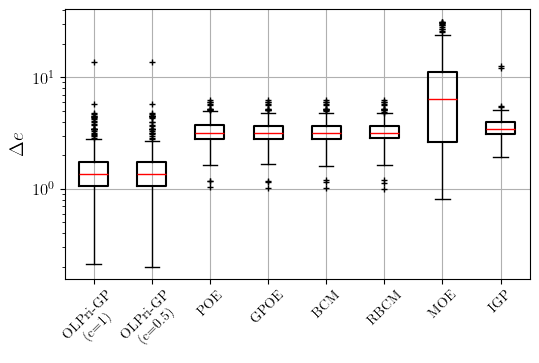

In [ ]:
fig = plt.figure(figsize=(6, 3.5))
box_data_prediction = [errors.flatten() for errors in prediction_errors.values()]
plt.boxplot(box_data_prediction, labels=labels, flierprops = flierprops, boxprops = boxprops, medianprops=medianprops,)
plt.yscale('log')  # Add this line to make y-axis logarithmic
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('$\Delta e$', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True)